In [2]:
!pip install torch torchvision torchaudio



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib numpy pandas scikit-learn jupyter notebook



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.2477, 0.3661, 0.2242],
        [0.4035, 0.3641, 0.6056],
        [0.3068, 0.9486, 0.0161],
        [0.1124, 0.6693, 0.7100],
        [0.0867, 0.0413, 0.1621]])


In [5]:
!pip install opencv-python tqdm seaborn transformers



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [7]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [42]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [43]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [45]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(7, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

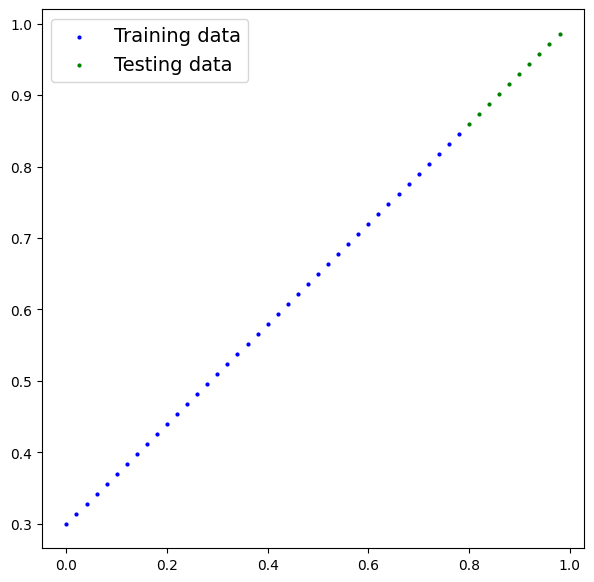

In [46]:
plot_predictions();

In [29]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights* x + self.bias




In [30]:
model_0=LinearRegression()


In [ ]:
torch.manual_seed(42)
model_0=LinearRegression()
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

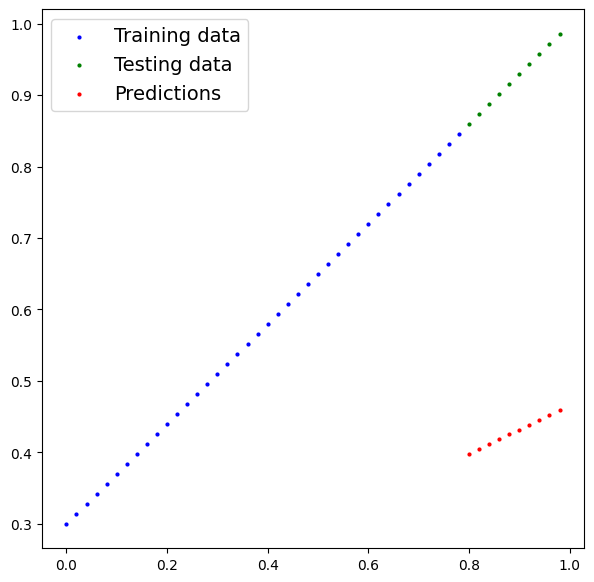

In [57]:
with torch.inference_mode():
    y_preds=model_0(X_test)

plot_predictions(predictions=y_preds);

In [49]:
y_test-y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [52]:
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

``` 
Its Train time.
do the foreawrd pass
calculate the loss
optimizer zero grad
loss backward 
optimizer step step step...

Lets test now.

with torch no grad:
do the foreward pass 
calculate the loss
go down down down 

```


In [82]:
torch.manual_seed(42)

epochs=1000

train_loss_values=[]
test_loss_values=[]
epochs_count=[]

for epochs in range(epochs):
    #Training

    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)

    #calculate the loss

    loss=loss_fn(y_pred,y_train)

    #optimizer zero grad
    optimizer.zero_grad()


    #loss backwaerd

    loss.backward()

    #optimzer step step...
    optimizer.step()

    #Testing
    #put the model in evalaution mood

    model_0.eval()

    with torch.inference_mode():

        test_pred=model_0(X_test)

        test_loss=loss_fn(test_pred, y_test.type(torch.float))
        if epochs % 10 == 0:
            epochs_count.append(epochs)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epochs} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.023080935701727867 | MAE Test Loss: 0.0534287691116333 
Epoch: 10 | MAE Train Loss: 0.019649803638458252 | MAE Test Loss: 0.045156221836805344 
Epoch: 20 | MAE Train Loss: 0.016210997477173805 | MAE Test Loss: 0.03688368946313858 
Epoch: 30 | MAE Train Loss: 0.01277900766581297 | MAE Test Loss: 0.02929801307618618 
Epoch: 40 | MAE Train Loss: 0.009346187114715576 | MAE Test Loss: 0.021025484427809715 
Epoch: 50 | MAE Train Loss: 0.005907376762479544 | MAE Test Loss: 0.012752944603562355 
Epoch: 60 | MAE Train Loss: 0.0024770735763013363 | MAE Test Loss: 0.005167287774384022 
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 100 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 110 | MAE Train Loss: 0.00893

In [55]:
y_preds.shape ,y_train.shape

(torch.Size([10, 1]), torch.Size([40, 1]))

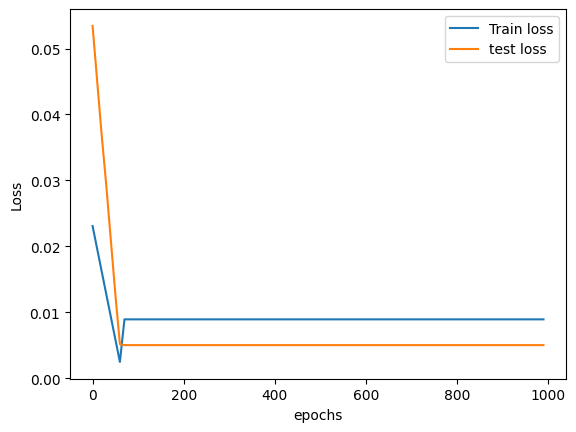

In [83]:
plt.plot(epochs_count,train_loss_values,label="Train loss")
plt.plot(epochs_count,test_loss_values,label="test loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

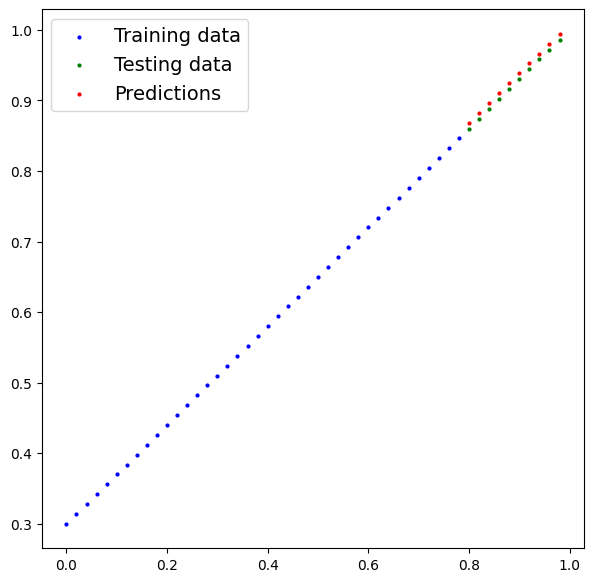

In [84]:
model_0.state_dict()

with torch.inference_mode():
    y_teest=model_0(X_test)

plot_predictions(predictions=y_teest);

In [85]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_0.pth


In [72]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

'ls' is not recognized as an internal or external command,
operable program or batch file.


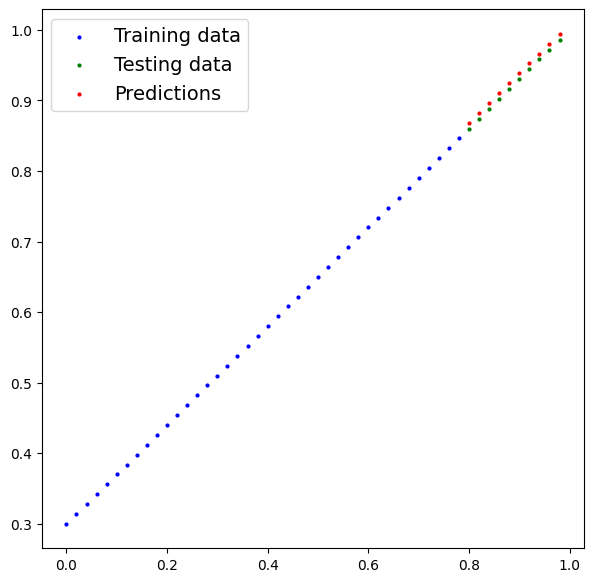

In [86]:
loaded_model_0=LinearRegression()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_test=loaded_model_0(X_test)

# plt.scatter(loaded_model_test,X_test,label="Diffrence")
plot_predictions(predictions=loaded_model_test);

